In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import math
import sympy

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.misc import derivative, electrocardiogram
from scipy.optimize import minimize, approx_fprime, fmin, brute
from scipy.signal import find_peaks

%matplotlib inline

# Функции

Построим функцию $$f(x)=\frac{1}{1-x}$$

/home/lena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


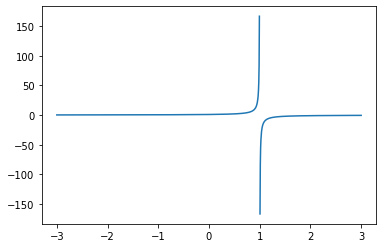

In [2]:
x = np.linspace(-3.0, 3.0, 1000)
y = np.array([1/(1-x_i) for x_i in x])
plt.plot(x, y)
plt.show()

Какова область определения? Какова область значения?

Построим функцию $$f(x)=2^{x}$$

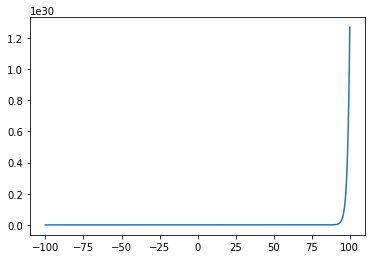

In [3]:
x = np.linspace(-100.0, 100.0, 1000)
y = np.array([math.pow(2, x_i) for x_i in x])
plt.plot(x, y)
plt.show()

# Способы представления функций

**Программный способ представления.**

Дана функция: ![alt text](https://pp.userapi.com/c854520/v854520891/aaadd/f5M6W-fRFjg.jpg). Напишем для неё код.

In [4]:
def func(x):
    stepen = 1/4*math.pow(x, 5) - math.pow(x, 4) + 1/4*math.pow(x, 3) + 3/2*math.pow(x, 2) +1
    y = 1 - pow(2, stepen)
    return y

**Графический способ представления функции.**

Нарисуем график написанной функции:

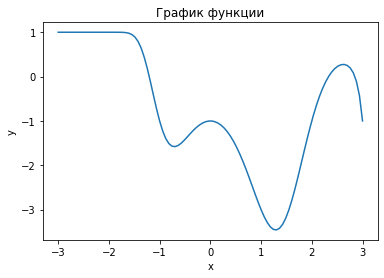

In [5]:
# создаем вектор x
x1 = np.linspace(-3.0, 3.0, 100)
# на основе вектора x строим значения для вектора y
y1 = [func(x1[i]) for i in range(len(x1))]

plt.plot(x1, y1)
plt.title('График функции')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

**Представление функции ввиде формулы.**

Иногда удобно представить функцию ввиде нескольких формул вместо одной. Например, функция y=abs(x). Если мы хотим записать алгоритм функции, легче всего разделить пространство аргументов на плоскости на 2 отрезка: от $-\infty$ до 0 включительно и от 0 до $+\infty $

![alt text](https://pp.userapi.com/c858028/v858028826/2c07f/SOjKZptkdXU.jpg)

# Полиномиальные функции или многочлены.

Целая рациональная функция (также полиномиальная функция) — числовая функция одного действительного переменного вида:
$$f(x) = a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{2}x^{2}+a_{1}x+a_{0}=\sum_{i=0}^{n}a_{i}x^{i}$$,
где $n\in \mathbb{N}, a_{n},a_{n-1},...,a_{2},a_{1},a_{0}\in \mathbb{R}, a_{n}\neq 0$

**Пример построения полинома: степень = 0.**

коэффициент a = 3

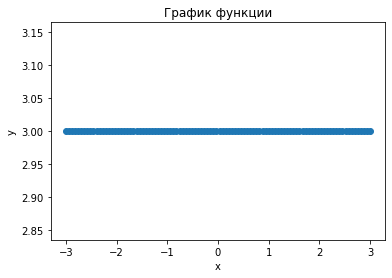

In [6]:
x1 = np.linspace(-3.0, 3.0, 100)
y1 = [3 for _ in range(len(x1))]
plt.plot(x1, y1, '-o')
plt.title('График функции')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

**Пример построения полинома степени 2: подбрасывание мяча**

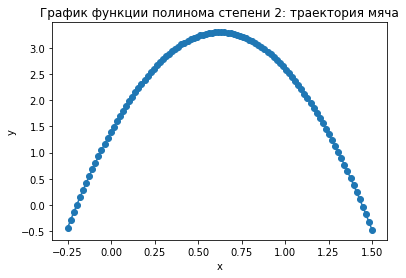

In [7]:
def polynom_2(x):
    y = -4.9*x*x + 6.1*x + 1.4
    return y

x1 = np.linspace(-0.25, 1.5, 100)
y1 = [polynom_2(x1[i]) for i in range(len(x1))]
plt.plot(x1, y1, '-o')
plt.title('График функции полинома степени 2: траектория мяча')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

**Пример построения полинома степени 2: Golden Gate в Сан-Франсиско**

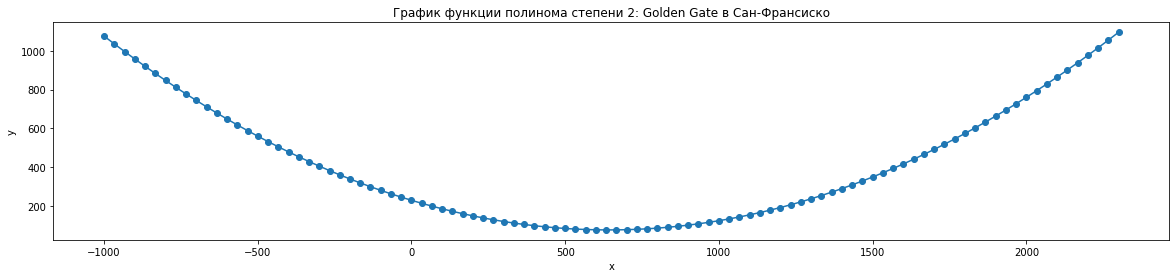

In [8]:
def polynom_golden_gate(x):
    y = 0.00037*x*x - 0.475*x + 230
    return y

x1 = np.linspace(-1000, 2300, 100)
y1 = [polynom_golden_gate(x1[i]) for i in range(len(x1))]
plt.figure(figsize=(20,4))
plt.plot(x1, y1, '-o')
plt.title('График функции полинома степени 2: Golden Gate в Сан-Франсиско')
plt.ylabel('y')
plt.xlabel('x')

plt.show()

# Предел 

/home/lena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


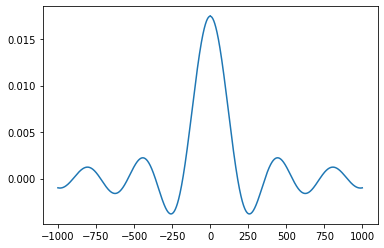

In [9]:
x = np.array([i for i in range(-1000, 1000)])
y = np.array([math.sin(math.radians(x_i))/x_i for x_i in x])
plt.plot(x, y)
plt.show()

Вычислим значение предела функции в точке x = 0

In [10]:
x = sympy.symbols('x') 
expr = sympy.sin(x)/x; 
    
print("Expression : {}".format(expr))  
      
# Use sympy.limit() method  
limit_expr = sympy.limit(expr, x, 0)   
      
print("Limit of the expression tends to 0 : {}".format(limit_expr))   

Expression : sin(x)/x
Limit of the expression tends to 0 : 1


# Примеры пределов

**Пример 1**

Построим график функции $$f(x)=(1+x)^{\frac{1}{x}}$$

/home/lena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


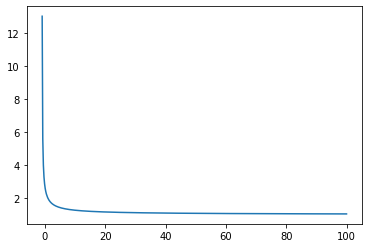

In [11]:
x = np.linspace(-100, 100, 1000)
y = np.array([(1+x_i)**(1/x_i) for x_i in x])

plt.plot(x, y)
plt.show()

При x->0 значение функции не известно

In [12]:
print((1+0)**(1/0))

ZeroDivisionError: division by zero

Если мы рассмотрим значение функции при x->0+, то значение функции будет стремиться к 2,72 (это число является экспонентой)

x = 0.0001

In [13]:
print((1+0.0001)**(1/0.0001))

2.7181459268249255


x = 0.0000001

In [14]:
print((1+0.0000001)**(1/0.0000001))

2.7182816941320818


Если мы рассмотрим предел слевам (когда x->0-), то значение функции будет стремиться к числу 2,72

In [15]:
print((1-0.0000001)**(1/-0.0000001))

2.7182819629423656


Предел в точке x = 0 стремится к константе exp = 2.72

In [16]:
print(math.exp(1))

2.718281828459045


**Предел 2**

Построим функцию $$f(x)=1/x$$

Функция неограниченно растет при приближении к x->0

/home/lena/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


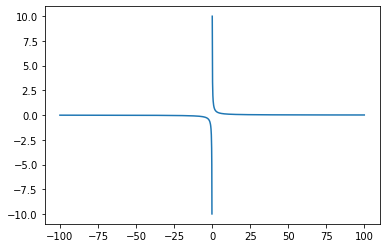

In [17]:
x = np.linspace(-100, 100, 1999)
y = np.array([1/x_i for x_i in x])

plt.plot(x, y)
plt.show()

# Исследование функции с помощью производных

**Сгенерированный пример**

Посмотрим данные, сгенерированные с помощью уравнения синуса

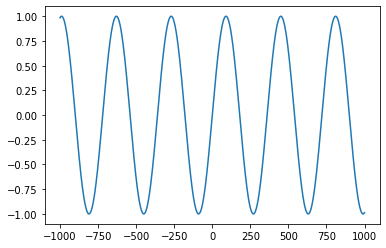

In [33]:
x = np.array([i for i in range(-1000, 1000)])
y = np.array([math.sin(math.radians(x_i)) for x_i in x])
plt.plot(x, y)

Первая производная

In [34]:
list_der_sin = []
for i in range(len(x)-1):
    list_der_sin.append((y[i+1]-y[i])/(x[i+1]-x[i]))
list_der_sin.append(list_der_sin[-1])

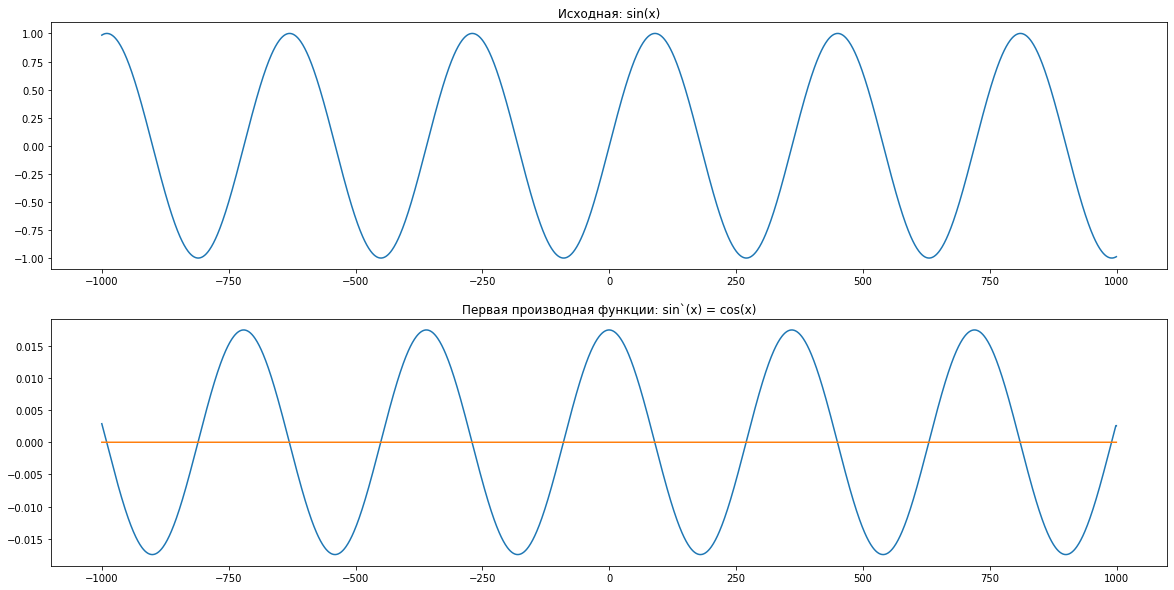

In [35]:
fig, axs = plt.subplots(2,figsize=(20,10))
axs[0].set_title('Исходная: sin(x)')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: sin`(x) = cos(x)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')

Вторая производная

In [36]:
list_second_der_sin = []
for i in range(len(x)-1):
    list_second_der_sin.append((list_der_sin[i+1]-list_der_sin[i])/(x[i+1]-x[i]))
list_second_der_sin.append(list_second_der_sin[-1])

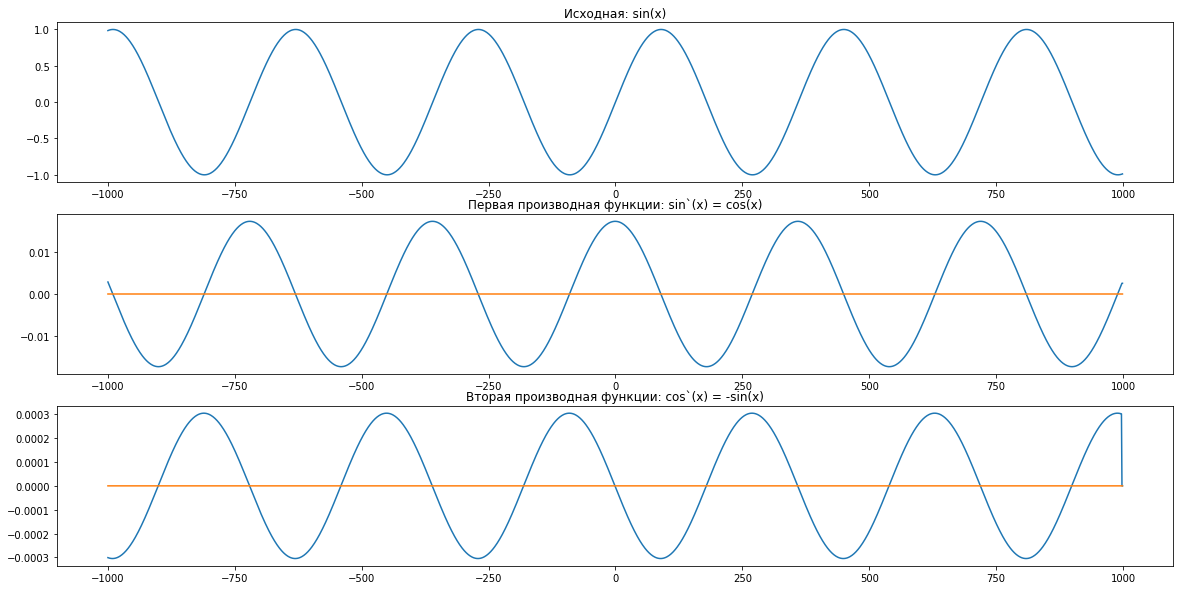

In [37]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная: sin(x)')
axs[0].plot(x, y)
axs[1].set_title('Первая производная функции: sin`(x) = cos(x)')
axs[1].plot(x, list_der_sin)
axs[1].plot(x, [0 for i in range(len(list_der_sin))], '-')
axs[2].set_title('Вторая производная функции: cos`(x) = -sin(x)')
axs[2].plot(x, list_second_der_sin)
axs[2].plot(x, [0 for i in range(len(list_der_sin))], '-')

**Реальный пример**

Рассмотрим график подъема человека по стене. Нам нужно определить, когда человек спустился с верхней точки.

In [10]:
data = pd.read_csv('video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


In [11]:
data.

(1237, 6)

In [13]:
data = data[:600]

Text(0, 0.5, 'изменение высоты по времени')

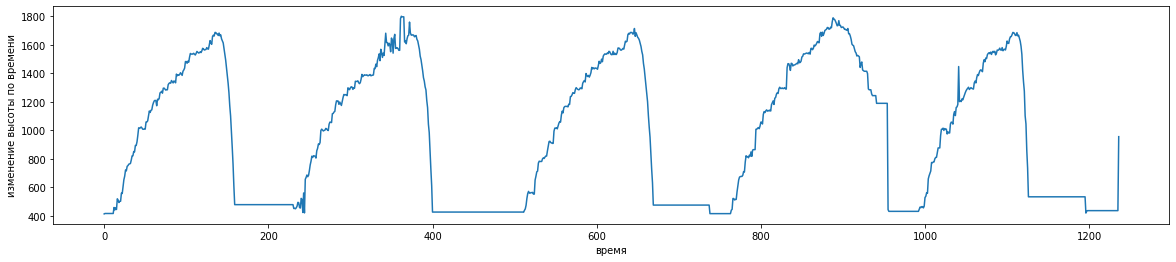

In [39]:
plt.figure(figsize=(20,4))
plt.plot(data.height)
plt.xlabel('время')
plt.ylabel('изменение высоты по времени')

Как найти точку подъема и точку спуска?

Построим график производной

In [40]:
list_ids = data.sec.unique()
list_derivatives = []
for i in range(len(list_ids)-1):
    sec_id_next = list_ids[i+1]
    sec_id = list_ids[i]
    height = list(data.loc[data.sec==sec_id, 'height'])[0]
    next_height = list(data.loc[data.sec==sec_id_next, 'height'])[0]
    list_derivatives.append((next_height - height)/(sec_id_next - sec_id))
list_derivatives.append(list_derivatives[-1])
data['first_derivative'] = list_derivatives

Построим график второй производной

In [41]:
list_ids = data.sec.unique()
second_list_derivatives = []
for i in range(len(list_ids)-1):
    sec_id_next = list_ids[i+1]
    sec_id = list_ids[i]
    derivative = list(data.loc[data.sec==sec_id, 'first_derivative'])[0]
    next_derivative = list(data.loc[data.sec==sec_id_next, 'first_derivative'])[0]
    if (next_height - height) == 0:
        second_list_derivatives.append(-10)    
    else:
        second_list_derivatives.append((next_derivative - derivative)/(sec_id_next - sec_id))
second_list_derivatives.append(second_list_derivatives[-1])
data['second_derivative'] = second_list_derivatives

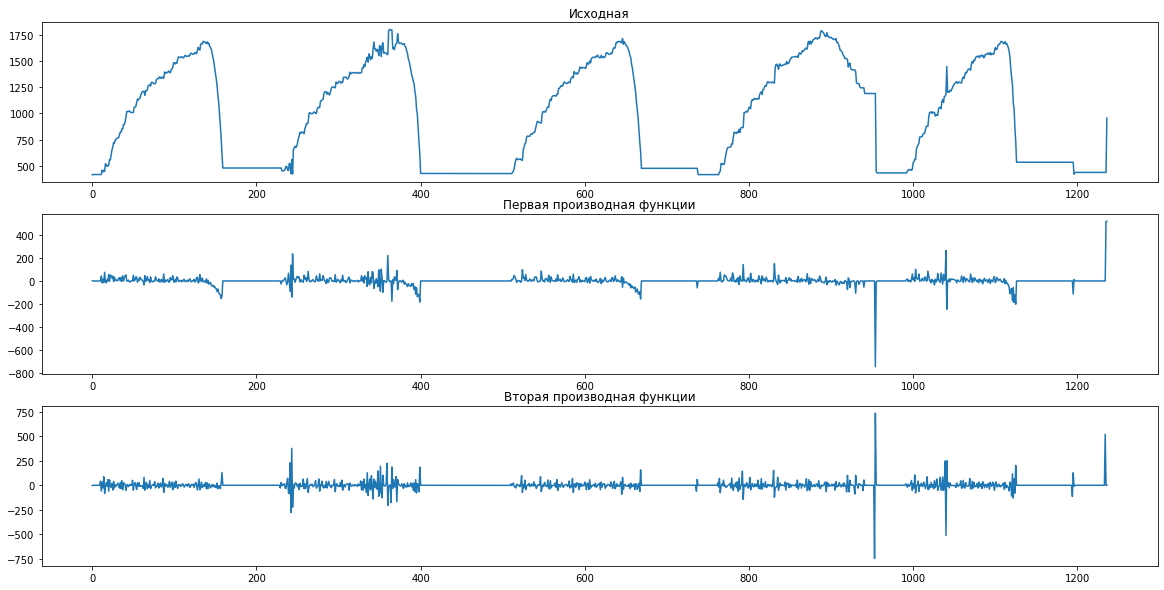

In [42]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная')
axs[0].plot([i for i in range(0, len(data))], data.height)
axs[1].set_title('Первая производная функции')
axs[1].plot([i for i in range(0, len(data['first_derivative']))], data['first_derivative'])
axs[2].set_title('Вторая производная функции')
axs[2].plot([i for i in range(0, len(data['second_derivative']))], data['second_derivative'])

Построим график изменения высоты для одного пролаза

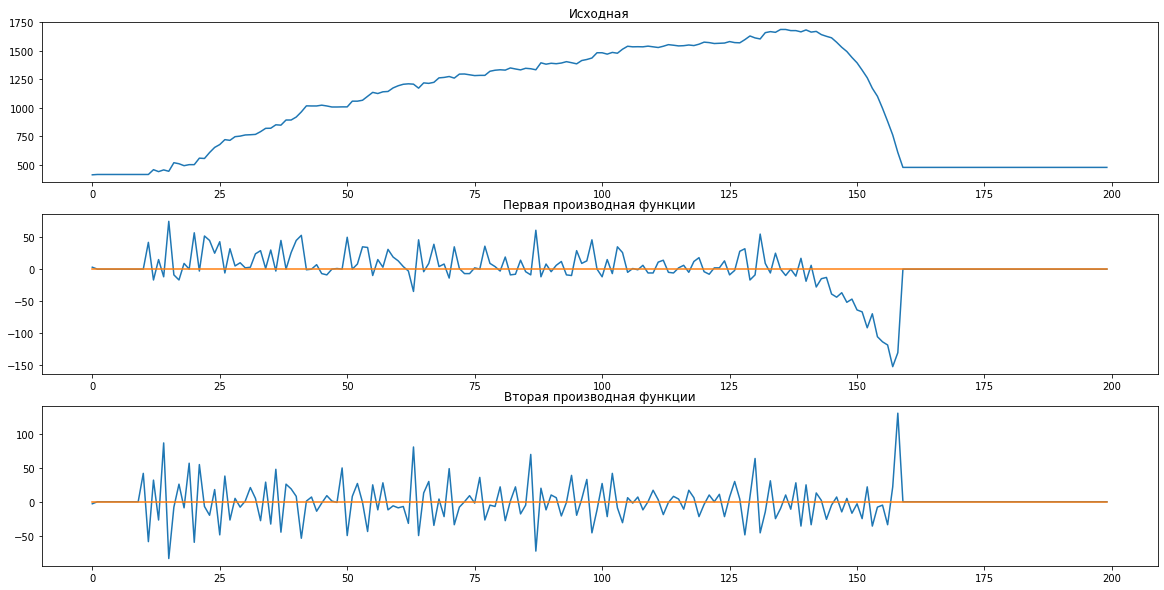

In [43]:
fig, axs = plt.subplots(3,figsize=(20,10))
axs[0].set_title('Исходная')
axs[0].plot([i for i in range(0, 200)], data.height[:200])
axs[1].set_title('Первая производная функции')
axs[1].plot([i for i in range(0, 200)], data['first_derivative'][:200])
axs[1].plot([i for i in range(200)], [0 for i in range(200)], '-')
axs[2].set_title('Вторая производная функции')
axs[2].plot([i for i in range(0, 200)], data['second_derivative'][:200])
axs[2].plot([i for i in range(200)], [0 for i in range(200)], '-')

Найдем точку топа (когда человек достиг самой высокой точки) с помощью команды **find_peaks** и атрибутов **prominence** и **width**:

**prominence**: The prominence of a peak measures how much a peak stands out from the surrounding baseline of the signal and is defined as the vertical distance between the peak and its lowest contour line.
    

**width**: Required width of peaks in samples. Either a number, None, an array matching x or a 2-element sequence of the former. The first element is always interpreted as the minimal and the second, if supplied, as the maximal required width.

Команда find_peaks: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

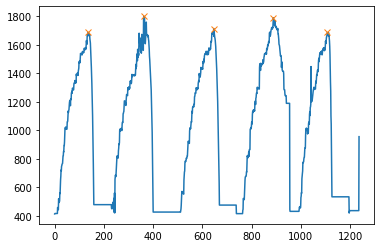

In [44]:
peaks, _ = find_peaks(data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()

### Поиск экстремумов

In [45]:
def f(x):
    return -1 * np.sin(x)/x

In [46]:
def f_(x):
    return -f(x)

### Поиск локальных минимумов

Optimization terminated successfully.
         Current function value: -0.128375
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 19
         Function evaluations: 38


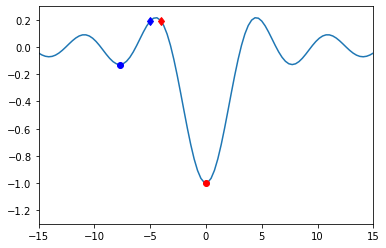

In [47]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f,x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Поиск локальных максимумов

Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: -0.217234
         Iterations: 13
         Function evaluations: 26


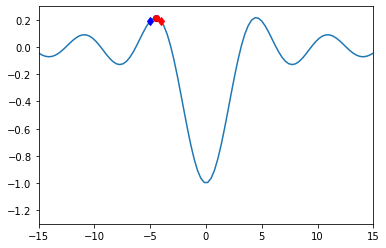

In [48]:
# objective function

x0 = -5 # start from x = -5
xmin0 = fmin(f_,x0)

x1 = -4 # start from x = -4
xmin1 = fmin(f_, x1)

# plot the function
x = np.linspace(-15,15,100)
y = f(x)
pylab.plot(x,y)
# plot of x0 and the minimum found startin from x0
pylab.plot(x0, f(x0), 'bd', xmin0, f(xmin0), 'bo')
# plot of x1 and the minimum found startin from x1
pylab.plot(x1, f(x1), 'rd', xmin1, f(xmin1), 'ro')

pylab.axis([-15,15,-1.3,0.3])
pylab.show()

### Производная

In [49]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2
derivative(f, 1.0, dx=1e-6)

4.999999999921734

derivative(f, 1.0, dx=1e-6):
*   given a function, use a central difference formula with spacing dx to compute the n-th derivative at x0.
*   1.0 - the point at which n-th derivative is found
*   dx - spacing

In [50]:
def f(x):
    return x ** 2 + 1

In [51]:
x = np.linspace(-10, 10)
fx = f(x)
f1x = [derivative(f, xx, dx=1e-6, n=1) for xx in x]

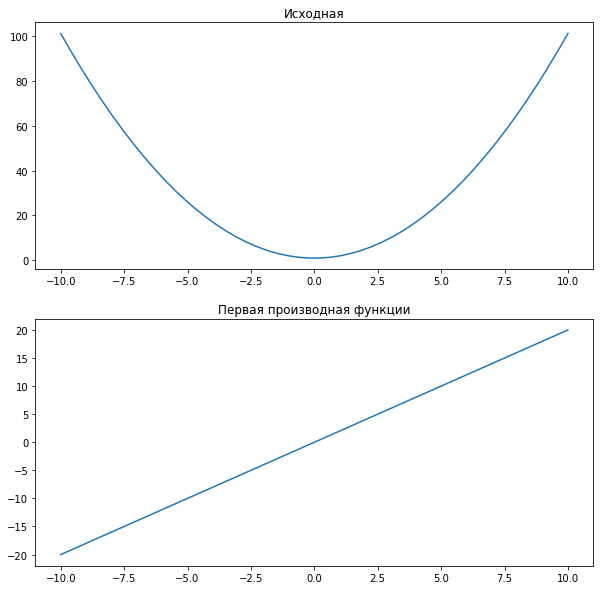

In [52]:
fig, axs = plt.subplots(2,figsize=(10,10))
axs[0].set_title('Исходная')
axs[0].plot(x, fx, label='function')
axs[1].set_title('Первая производная функции')
axs[1].plot(x, f1x, label='derivative')

### Частные производные

In [53]:
def func(x, c0, c1):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 + c1 * x[1]**2

In [54]:
x = np.ones(2)
c0, c1 = (1, 2)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1)

array([2.        , 4.00000003])

### Вычисление частных производных

Хотим посчитать частные производные функции $f(x,y)=x^3y-x^2y^2+x-1$ в точке (1, 1)

$f'_x=3x^2y-2xy^2+1$

$f'_y=x^3-2x^2y$

$f'_x(1,1)=3-2+1=2$

$f'_y(1,1)=1-2=-1$

$grad_f(1,1) = (2, -1)$

# Пример оптимизационной задачи

Вектора. Загрузим датасет "Hessen House Prices Dataset" из kaggle (https://www.kaggle.com/orgesleka/hessen-house-prices-dataset). 1 вектор в данной таблице - это один дом с различными показателями.

In [2]:
url="http://yustiks.ru/dataset/houses.json"
df=pd.read_json(url)
df.head()

,Aktuell_vermietet,Angebotstyp,Badewanne,Balkon,Barrierefrei,Baujahr,Dachboden,Denkmalobjekt,Dusche,Einbaukueche,...,Wohnflaeche__m²_,Zimmer,abtest,adid,elasticSearch,kw,plz,posterid,yo_m,yo_s
0,NaN,Angebot,NaN,NaN,NaN,1928.0,NaN,NaN,NaN,NaN,...,160,6,control,721918176,VIP_a-default,Ein__bis_Zweifamilienhaus_in_Wiedenbrueck,33378,50316225,A,A
1,NaN,Angebot,true,NaN,NaN,1968.0,NaN,NaN,true,NaN,...,160,8.0,control,723667067,VIP_a-default,Renovierungsbeduerftiges_grosszuegiges_Haus_in...,65207,50379245,A,A
2,NaN,Angebot,NaN,NaN,NaN,1750.0,NaN,NaN,NaN,NaN,...,120,4,control,709516362,VIP_a-default,Beidseitig_angebautes__schnuckeliges__geraeumi...,54647,40815451,A,A
3,NaN,Angebot,true,NaN,NaN,2017.0,NaN,NaN,true,NaN,...,140,5,control,734728768,VIP_a-default,Das_variable_Familienhaus_mit_Wohlfuehlgarantie,7646,49513983,A,A
4,NaN,Angebot,NaN,NaN,NaN,1900.0,NaN,NaN,NaN,NaN,...,80,4,control,709556588,VIP_a-default,Haus_im_Gruenen,54597,49797192,A,A


Три атрибута - год покупки, цена на дом, и метраж (сколько метров представляет собой жил площадь)

In [3]:
df = df[['Baujahr', 'ExactPreis', 'Wohnflaeche__m²_']]

In [4]:
df = df.dropna()

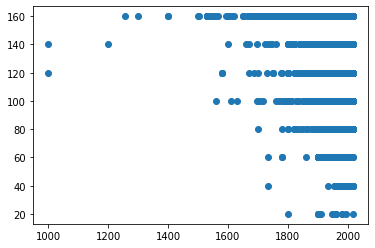

In [5]:
plt.scatter(df['Baujahr'], df['Wohnflaeche__m²_'])

In [6]:
x = np.array(df[['Baujahr', 'Wohnflaeche__m²_']])
y = np.array(df['ExactPreis'])

In [8]:
import random

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        # avg gradient per example
        gradient = np.dot(xTrans, ) / m
        # update
        theta = theta - alpha * gradient
    return theta


def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zlosseros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

#gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 10)
m, n = np.shape(x)
numIterations= 100
alpha = 0.0005
theta = np.ones(n)
theta = gradientDescent(x, y, theta, alpha, m, numIterations)
print(theta)

AttributeError: module 'numpy' has no attribute 'zlosseros'

Text(0, 0.5, 'y')

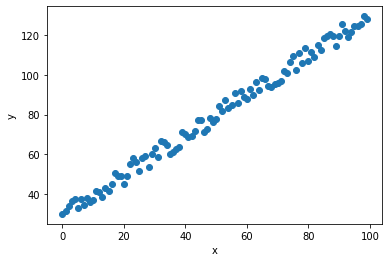

In [39]:
plt.scatter(x[:,1], y)
plt.xlabel('x')
plt.ylabel('y')

# Пример функции №2:

In [370]:
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

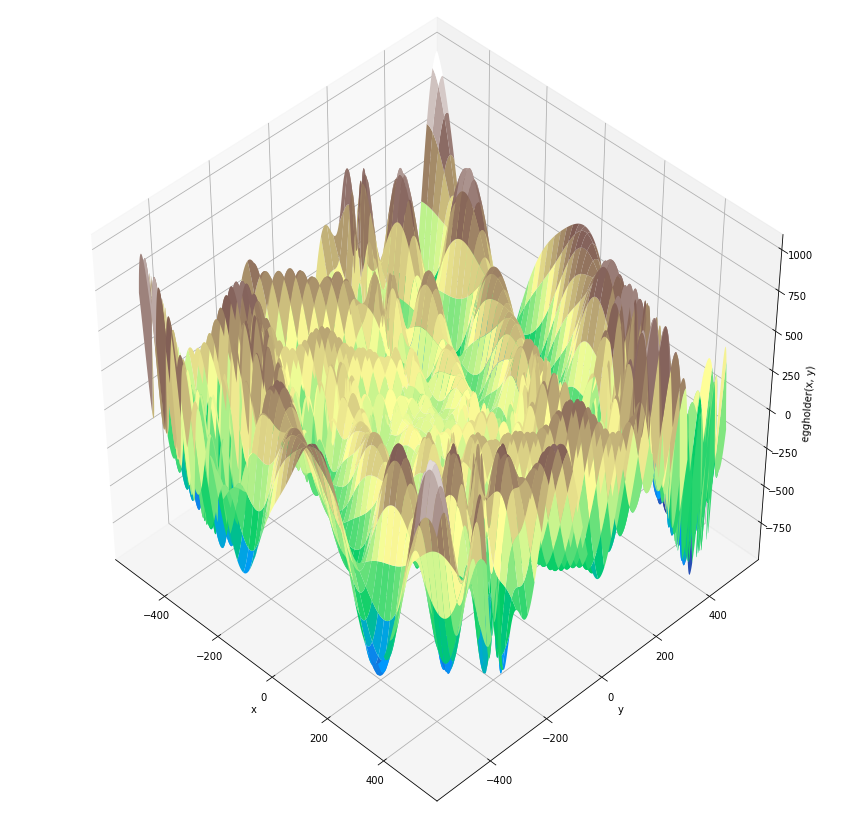

In [375]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()